# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://iie.fing.edu.uy/~mdelbra/DL2016) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [13]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [14]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [15]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

/Users/Bruno/Downloads/assignment1/cs231n/features.py:121: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  orientation_histogram[:,:,i] = uniform_filter(temp_mag, size=(cx, cy))[cx/2::cx, cy/2::cy].T


Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train Softmax on features
Using the multiclass Softmax code developed earlier in the assignment, train SoftMaxs on top of the features extracted above; this should achieve better results than training SoftMaxs directly on top of raw pixels.

In [5]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import Softmax

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [1e5, 1e6, 1e7]

results = {}
best_val = -1
best_softmax = None

# pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the Softmax;     #
# save the best trained classifer in best_softmax. You might also want to play #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near [0.42] on the validation set.     #
################################################################################
# pass
for lr in learning_rates:
    for rs in regularization_strengths:
        softmax = Softmax()
        loss_hist = softmax.train(X_train_feats, y_train, learning_rate=lr, reg=rs, num_iters=1500, verbose=True)
        y_train_pred = softmax.predict(X_train_feats)
        y_val_pred = softmax.predict(X_val_feats)
        results[(lr,rs)] = (np.mean(y_train == y_train_pred),np.mean(y_val == y_val_pred))
        if np.mean(y_val == y_val_pred) > best_val:
            best_val = np.mean(y_val == y_val_pred)
            best_softmax = softmax
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1500: loss 81.123266
iteration 100 / 1500: loss 79.562234
iteration 200 / 1500: loss 78.034754
iteration 300 / 1500: loss 76.533058
iteration 400 / 1500: loss 75.062781
iteration 500 / 1500: loss 73.622058
iteration 600 / 1500: loss 72.211943
iteration 700 / 1500: loss 70.827570
iteration 800 / 1500: loss 69.469918
iteration 900 / 1500: loss 68.139696
iteration 1000 / 1500: loss 66.834964
iteration 1100 / 1500: loss 65.557892
iteration 1200 / 1500: loss 64.306731
iteration 1300 / 1500: loss 63.080141
iteration 1400 / 1500: loss 61.874796
iteration 0 / 1500: loss 826.993854
iteration 100 / 1500: loss 677.433402
iteration 200 / 1500: loss 554.998238
iteration 300 / 1500: loss 454.765084
iteration 400 / 1500: loss 372.712522
iteration 500 / 1500: loss 305.536800
iteration 600 / 1500: loss 250.544972
iteration 700 / 1500: loss 205.526260
iteration 800 / 1500: loss 168.671236
iteration 900 / 1500: loss 138.500493
iteration 1000 / 1500: loss 113.800646
iteration 1100 / 1500: lo

In [6]:
# Evaluate your trained Softmax on the test set
y_test_pred = best_softmax.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.419


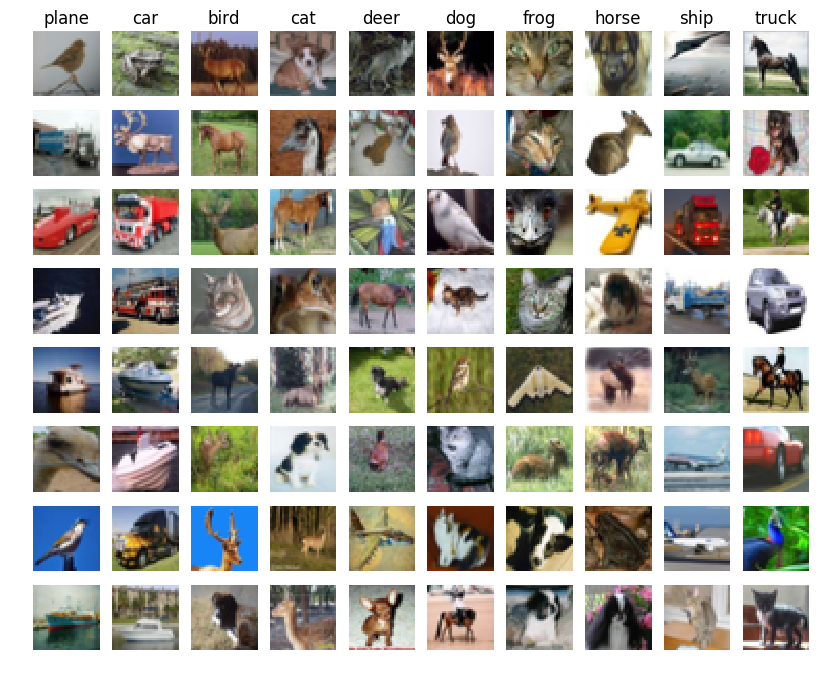

In [7]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

Las imágenes mal clasificadas de animales, suelen ser imágenes de otros animales lo cual tiene sentido ya que probablemente compartan varias características con la mayoría de las imágenes de la clase a la que fueron asignados como el color mismo del animal, o el fondo de la  imagen que suele ser de naturaleza para los animales.

Las imágenes clasificadas erróneamente como aviones son en su mayoría pájaros con un fondo de cielo o lanchas con un fondo de agua/cielo, por lo que supongo que el fondo de la imagen fue el factor determinante para la clasificación equivocada.

Las imágenes clasificadas erróneamente como autos en cambio son en su mayoría otros vehículos como camiones o lanchas, por lo cual fueron las características mismas del vehículo las cuales eran parecidas a la de otros autos y por eso la clasificacioón equivocada.

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [43]:
print(X_train_feats.shape)

(49000, 155)


In [46]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 1500
num_classes = 10

# net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None
best_val_acc = -1
best_h_s   = 0
best_n_i   = 0
best_l_r   = 0
best_r     = 0
best_l_r_d = 0
best_b_S   = 0
################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################

# En las listas comentadas se muestra los valores que se probaron para cada hyperparámetro.
# Finalmente me quedo sólo con el que dio mejores resultados para cada uno. 

# hidden_size = [10,25,50,75,100]
# hidden_size = [100,120,130]
# hidden_size = [130,140,150,200,300,500]
# hidden_size = [500,600,700,1000]
hidden_size = [500]
# num_iters = [500,1000,1500,2000]
# num_iters = [2000,2500,3000]
num_iters = [3000]
# learning_rate = [.5,.6,.7,.8,.9]
# learning_rate = [.75,.8,.85]
learning_rate = [.85]
# reg = [.1,.25,.5,.75,.9]
# reg = [.02,.04,.06,.08,.1]
# reg = [.003,.004,.005,.006,.007]
# reg = [.002,.0025,.003,.0035]
reg = [.0025]
# learning_rate_decay = [.50,.75,.90,.95]
learning_rate_decay = [.95]
# batch_size = [200,500,1000]
batch_size = [1000]

for h_s in hidden_size:
    for n_i in num_iters:
        for l_r in learning_rate:
            for r in reg:    
                for l_r_d in learning_rate_decay:
                    for b_s in batch_size:
                        print("h_s:",h_s)
                        print("n_i:",n_i)
                        print("l_r:",l_r)
                        print("r:",r)
                        print("l_r_d:",l_r_d)
                        print("b_s:",b_s)

                        net = TwoLayerNet(input_dim, h_s, num_classes)

                        # Train the network
                        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                    num_iters=n_i, batch_size=b_s,
                                    learning_rate=l_r, learning_rate_decay=l_r_d,
                                    reg=r, verbose=False)

                        # Predict on the validation set
                        val_acc = (net.predict(X_val_feats) == y_val).mean()
                        print('Validation accuracy: ', val_acc)
                        if val_acc > best_val_acc:
                            best_val_acc = val_acc
                            best_net   = net
                            best_h_s   = h_s
                            best_n_i   = n_i
                            best_l_r   = l_r
                            best_r     = r
                            best_l_r_d = l_r_d
                            best_b_s   = b_s

print('Best Validation accuracy: ', best_val_acc)
print('Best Hidden Size: ', best_h_s)
print('Best Num Iters: ', best_n_i)
print('Best Learning Rate: ', best_l_r)
print('Best Reg: ', best_r)
print('Best Learning Rate Decay: ', best_l_r_d)
print('Best Batch Size: ', best_b_s)

net = best_net
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

h_s: 500
n_i: 3000
l_r: 0.85
r: 0.0025
l_r_d: 0.95
b_s: 1000
Validation accuracy:  0.612
Best Validation accuracy:  0.612
Best Hidden Size:  500
Best Num Iters:  3000
Best Learning Rate:  0.85
Best Reg:  0.0025
Best Learning Rate Decay:  0.95
Best Batch Size:  1000


In [47]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.584
